In [1]:
url = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv')

In [152]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import requests 

In [4]:
def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

In [5]:
filename = 'autoprice.csv'

In [6]:
download(url, filename)

In [7]:
df = pd.read_csv('autoprice.csv')
df.head(2)

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1


In [8]:
values = df['stroke'].isnull()
values

0      False
1      False
2      False
3      False
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Name: stroke, Length: 201, dtype: bool

In [9]:
for index, value in values.iteritems():
     if value:
            print(index)
            print(value)
            
    

52
True
53
True
54
True
55
True


In [10]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace = True)

In [11]:
df = df._get_numeric_data()

In [12]:
df.head(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1


# SIMPLE LINEAR REGRESSION

<AxesSubplot:xlabel='horsepower', ylabel='price'>

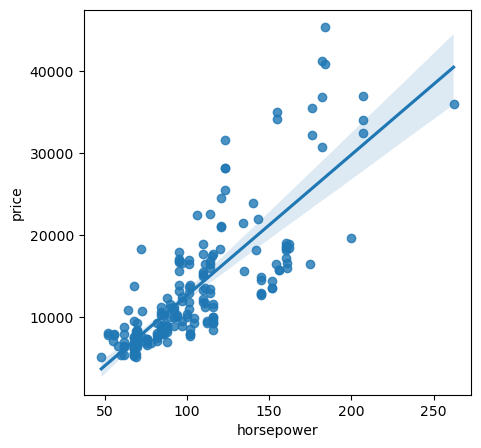

In [154]:
plt.figure(figsize=(5,5))
sns.regplot(x= 'horsepower', y='price', data =df)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [126]:
X = df.drop('price', axis=1)

In [129]:
Y = df[['price']]
Y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
196,16845.0
197,19045.0
198,21485.0
199,22470.0


In [130]:
#impute missing values 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

In [131]:
X_data = imputer.fit_transform(X)

In [132]:
Y_data = imputer.fit_transform(Y.values.reshape(-1, 1))

In [133]:
X_data1 = pd.DataFrame(X_data, columns=X.columns)
X_data1

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,3.0,122.0,88.6,0.811148,0.890278,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,11.190476,0.0,1.0
1,3.0,122.0,88.6,0.811148,0.890278,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,11.190476,0.0,1.0
2,1.0,122.0,94.5,0.822681,0.909722,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,12.368421,0.0,1.0
3,2.0,164.0,99.8,0.848630,0.919444,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,9.791667,0.0,1.0
4,2.0,164.0,99.4,0.848630,0.922222,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,13.055556,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.0,109.1,0.907256,0.956944,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,10.217391,0.0,1.0
197,-1.0,95.0,109.1,0.907256,0.955556,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,12.368421,0.0,1.0
198,-1.0,95.0,109.1,0.907256,0.956944,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,13.055556,0.0,1.0
199,-1.0,95.0,109.1,0.907256,0.956944,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,9.038462,1.0,0.0


In [136]:
Y_data1 = pd.DataFrame(Y_data, columns=Y.columns)
Y_data1

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
196,16845.0
197,19045.0
198,21485.0
199,22470.0


In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data1, Y_data1, test_size = 0.1, random_state = 0)

In [138]:
X_train.shape[0]

180

In [139]:
X_test.shape[0]

21

In [300]:
lr = LinearRegression()

In [301]:
X_train

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
10,0.0,192.0,101.2,0.849592,0.900000,54.3,2395.0,108.0,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,10.217391,0.0,1.0
194,-2.0,103.0,104.3,0.907256,0.933333,56.2,3045.0,130.0,3.62,3.15,7.5,162.0,5100.0,17.0,22.0,13.823529,0.0,1.0
73,2.0,161.0,93.7,0.755887,0.894444,50.8,1918.0,92.0,2.97,3.23,9.4,68.0,5500.0,37.0,41.0,6.351351,0.0,1.0
197,-1.0,95.0,109.1,0.907256,0.955556,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,12.368421,0.0,1.0
178,2.0,122.0,97.3,0.825084,0.909722,55.7,2261.0,97.0,3.01,3.40,23.0,52.0,4800.0,37.0,46.0,6.351351,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-1.0,93.0,115.6,0.973570,0.995833,56.3,3770.0,183.0,3.58,3.64,21.5,123.0,4350.0,22.0,25.0,10.681818,1.0,0.0
192,-2.0,103.0,104.3,0.907256,0.933333,56.2,2935.0,141.0,3.78,3.15,9.5,114.0,5400.0,24.0,28.0,9.791667,0.0,1.0
117,1.0,154.0,93.7,0.755887,0.886111,50.6,1967.0,90.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0,7.580645,0.0,1.0
47,1.0,104.0,93.1,0.764536,0.891667,54.1,1890.0,91.0,3.03,3.15,9.0,68.0,5000.0,30.0,31.0,7.833333,0.0,1.0


In [142]:
X_test

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
18,1.0,98.0,94.5,0.749159,0.883333,52.0,1874.0,90.0,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,6.184211,0.0,1.0
170,-1.0,65.0,102.4,0.843825,0.923611,54.9,2480.0,110.0,3.27,3.35,22.5,73.0,4500.0,30.0,33.0,7.833333,1.0,0.0
107,0.0,122.0,114.2,0.955790,0.950000,58.7,3430.0,152.0,3.70,3.52,21.0,95.0,4150.0,25.0,25.0,9.400000,1.0,0.0
98,0.0,128.0,100.4,0.873138,0.923611,55.1,3095.0,181.0,3.43,3.27,9.0,152.0,5200.0,17.0,22.0,13.823529,0.0,1.0
177,-1.0,122.0,104.5,0.902451,0.923611,54.1,3151.0,161.0,3.27,3.35,9.2,156.0,5200.0,19.0,24.0,12.368421,0.0,1.0
182,2.0,94.0,97.3,0.825084,0.909722,55.7,2275.0,109.0,3.19,3.40,9.0,85.0,5250.0,27.0,34.0,8.703704,0.0,1.0
5,2.0,122.0,99.8,0.851994,0.920833,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,12.368421,0.0,1.0
146,1.0,87.0,95.7,0.762614,0.883333,54.5,1985.0,92.0,3.05,3.03,9.0,62.0,4800.0,35.0,39.0,6.714286,0.0,1.0
12,0.0,188.0,101.2,0.849592,0.900000,54.3,2765.0,164.0,3.31,3.19,9.0,121.0,4250.0,21.0,28.0,11.190476,0.0,1.0
152,0.0,91.0,95.7,0.799135,0.894444,53.0,2081.0,98.0,3.19,3.03,9.0,70.0,4800.0,30.0,37.0,7.833333,0.0,1.0


In [143]:
Y_train

,price
145,11694.0
45,35550.0
159,8058.0
60,10795.0
123,32528.0
...,...
67,31600.0
192,15985.0
117,6229.0
47,5195.0


In [144]:
lr.fit(X_train[['horsepower']], Y_train)


LinearRegression()

In [147]:
y_pred = lr.predict(X_test[['horsepower']])

C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

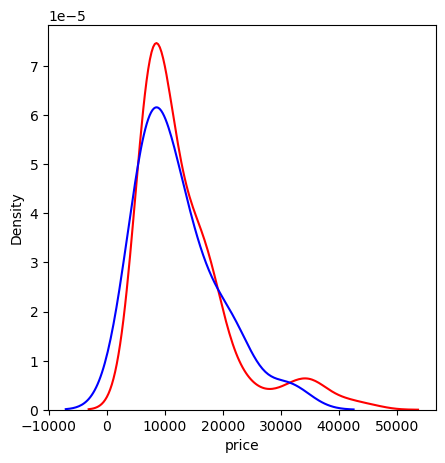

In [165]:
plt.figure(figsize=(5,5))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Values', ax=ax1)

In [170]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [172]:
print('MAE:', mean_absolute_error(Y_test,y_pred))
print('MSE:', mean_squared_error(Y_test,y_pred))
print('RMSE:', np.sqrt(mean_absolute_error(Y_test,y_pred)))

MAE: 2835.746917606648
MSE: 12943594.86371688
RMSE: 53.25173159256559


In [174]:
print('R-squared:', r2_score(Y_test,y_pred))

R-squared: 0.7340722810055448


# CROSS VALIDATION

In [175]:
from sklearn.model_selection import cross_val_score

In [177]:
Rcross = cross_val_score(lr, X_data1[['horsepower']], Y_data1, cv=4)

In [178]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [180]:
Rcross.mean()

0.522009915042119

In [181]:
Rcross.std()

0.2911839444756029

In [186]:
from sklearn.model_selection import cross_val_predict

In [187]:
Rpredict = cross_val_predict(lr, X_data1[['horsepower']], Y_data1, cv=4)

In [189]:
Rpredict[0:5]

array([[14141.63807508],
       [14141.63807508],
       [20814.29423473],
       [12745.03562306],
       [14762.35027598]])

# MULTIPLE LINEAR REGRESSION

In [192]:
Mlr = LinearRegression()

In [194]:
Mlr.fit(X_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], Y_train)

LinearRegression()

In [195]:
yhat_train = Mlr.predict(X_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [196]:
yhat_test = Mlr.predict(X_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [197]:
%matplotlib inline

In [223]:
def DistributionPlot(Fiona, David):
    width = 5
    height = 5
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(Fiona, hist=False, color="r", label='Actual Value')
    ax2 = sns.distplot(David, hist=False, color="b", label='Fitted Value',ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


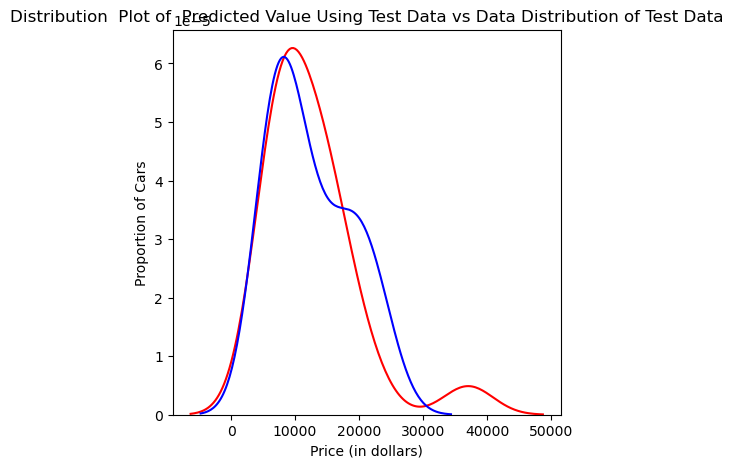

In [225]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(Y_test,yhat_test)

C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


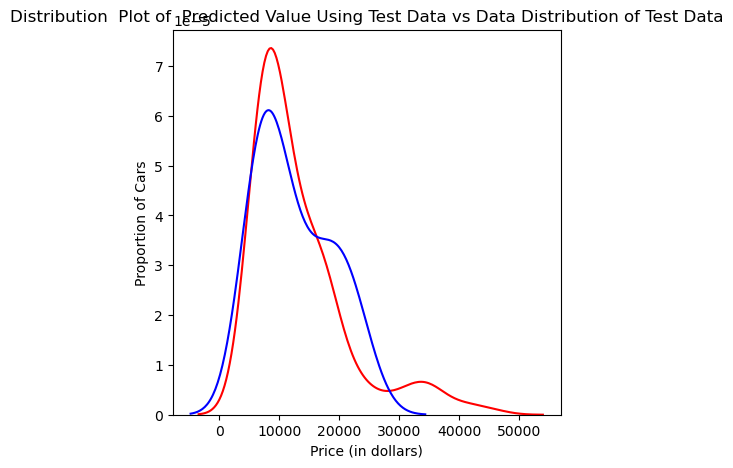

In [226]:
DistributionPlot(Y_train,yhat_test)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [285]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data1, Y_data1, test_size = 0.45, random_state = 0)

In [286]:
from sklearn.preprocessing import PolynomialFeatures

In [287]:
pr = PolynomialFeatures(degree=5)
X_train_pr = pr.fit_transform(X_train[['horsepower']])
X_test_pr = pr.fit_transform(X_test[['horsepower']])

In [288]:
pr

PolynomialFeatures(degree=5)

In [289]:
poly=LinearRegression()
poly.fit(X_train_pr, Y_train)

LinearRegression()

In [290]:
yhat_pr = poly.predict(X_test_pr)

Let's take the first five predicted values and compare it to the actual targets.

In [291]:
print('predicted values:', yhat_pr[0:4])
print('actual values:', Y_test[0:4].values)

predicted values: [[ 6728.70635688]
 [ 7308.02977067]
 [12213.7853793 ]
 [18893.18863048]]
actual values: [[ 6295.]
 [10698.]
 [13860.]
 [13499.]]


In [299]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

InvalidIndexError: (slice(None, None, None), None)

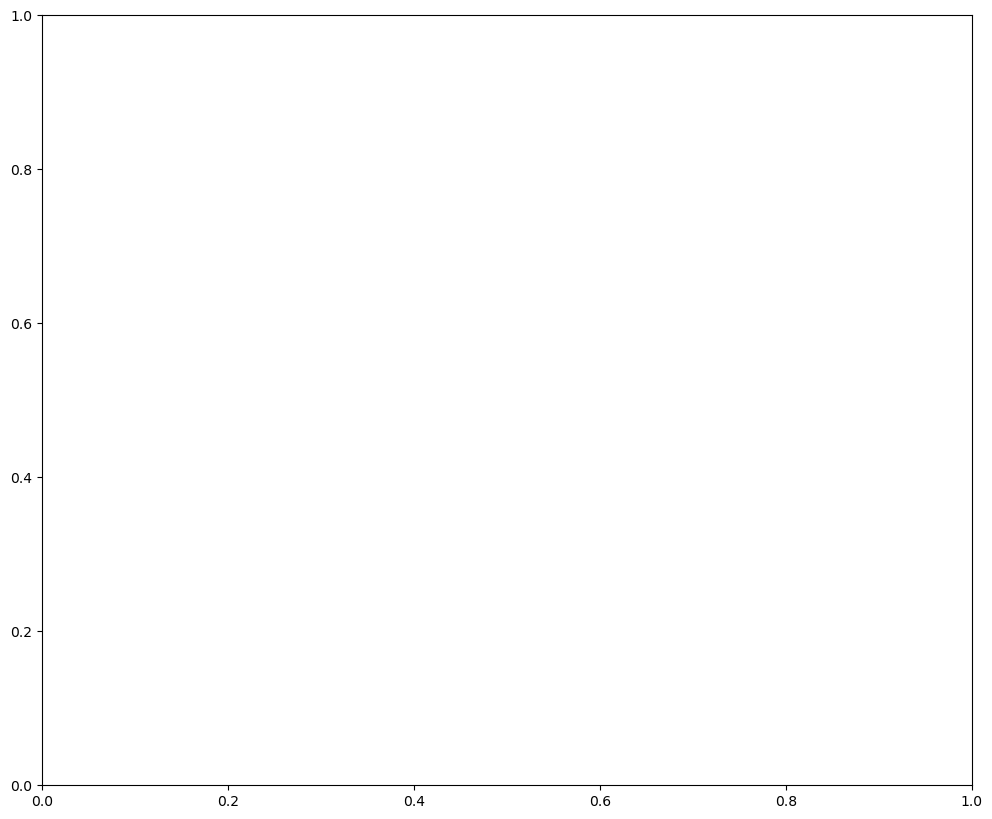

In [303]:
PollyPlot(X_train['horsepower'], X_test['horsepower'], Y_train, Y_test, poly,pr)

In [293]:
poly.score(X_train_pr, Y_train)

0.5567716902638294

Text(3, 0.75, 'Maximum R^2 ')

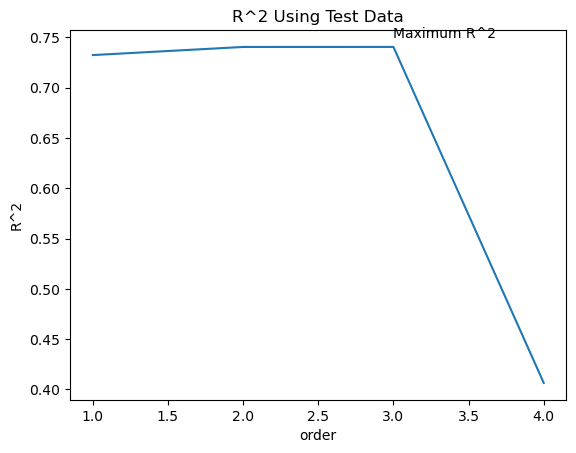

In [297]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    X_train_pr = pr.fit_transform(X_train[['horsepower']])
    
    X_test_pr = pr.fit_transform(X_test[['horsepower']])    
    
    lr.fit(X_train_pr, Y_train)
    
    Rsqu_test.append(lr.score(X_test_pr, Y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  

In [298]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)